In [2]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np

def get_dfs(fsuffix):
    db_df = pd.read_csv("data/db_%s.csv" % fsuffix)
    s_df = pd.read_csv("data/shilldb_%s.csv" % fsuffix)
    
    return db_df, s_df

def plot_benchmark(fsuffix):
    d, s = get_dfs(fsuffix)
    
    plt.xlim(-10, 110)
    plt.errorbar(range(0, 110, 10), d.mean().values[1:], yerr=d.std().values[1:])
    plt.errorbar(range(0, 110, 10), s.mean().values[1:], yerr=d.std().values[1:])

    plt.show()
    
    (s.mean() / d.mean())[1:].plot()
    
def benchmark_details(fsuffix):
    d, s = get_dfs(fsuffix)
    
    d_low, d_high = st.t.interval(0.95, len(d)-1, loc=np.mean(d), scale=st.sem(d))
    s_low, s_high = st.t.interval(0.95, len(s)-1, loc=np.mean(s), scale=st.sem(s))
    
    d_info = zip(range(-10, 110, 10), d.mean(), d.mean() - d_low)[1:]
    s_info = zip(range(-10, 110, 10), s.mean(), s.mean() - s_low)[1:]
    
    for d in d_info:
        print '%d, %.5f, %.5f' % d
        
    print "\n\n"
        
    for s in s_info:
        print '%d, %.5f, %.5f' % s
        
    print "\n\n"
    
    for (s, dm, _), (_, sm, _) in zip(d_info, s_info):
        print '%d, %.5f' % (s, sm / dm)
    
#     return zip(range(0, 110, 10), d.mean(), d.mean() - d_low)[1:], zip(range(0, 110, 10), s.mean(), s.mean() - s_low)[1:] 
#     return s.mean(), d.mean()
    

In [3]:
benchmark_details("update_no_trig")

0, 0.09683, 0.00123
10, 0.10559, 0.00133
20, 0.10953, 0.00109
30, 0.11407, 0.00148
40, 0.11679, 0.00181
50, 0.12023, 0.00163
60, 0.12483, 0.00147
70, 0.12933, 0.00129
80, 0.13185, 0.00122
90, 0.13733, 0.00116
100, 0.13835, 0.00162



0, 0.12364, 0.00125
10, 0.13366, 0.00186
20, 0.14020, 0.00165
30, 0.14323, 0.00182
40, 0.14553, 0.00170
50, 0.15031, 0.00144
60, 0.15507, 0.00194
70, 0.16034, 0.00141
80, 0.16176, 0.00141
90, 0.16614, 0.00116
100, 0.16819, 0.00161



0, 1.27688
10, 1.26584
20, 1.28001
30, 1.25563
40, 1.24608
50, 1.25019
60, 1.24225
70, 1.23977
80, 1.22685
90, 1.20979
100, 1.21568


## Update

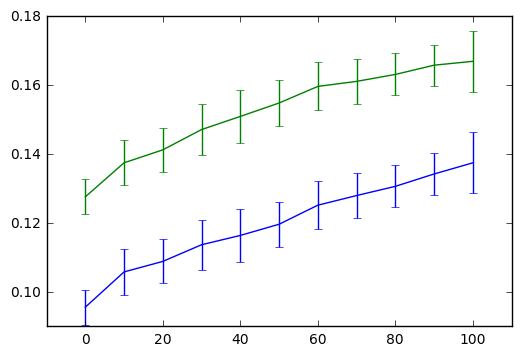

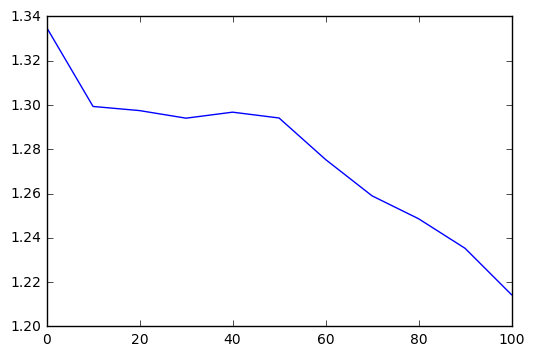

In [57]:
plot_benchmark("updatefail_large")

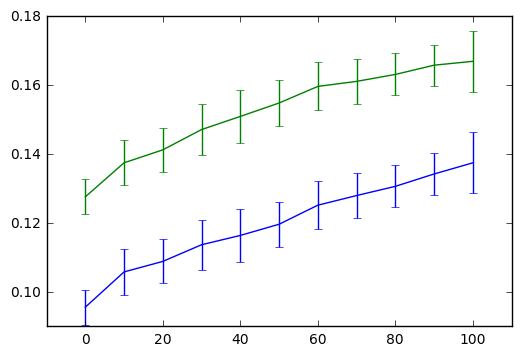

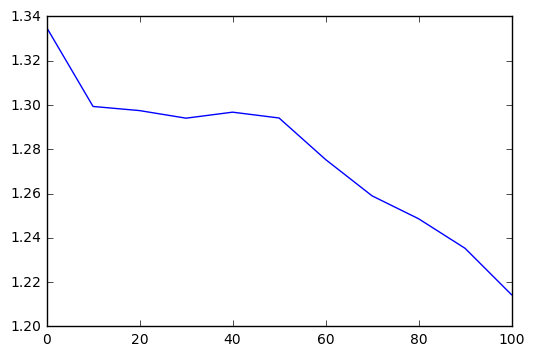

In [4]:
plot_benchmark("updatefail_large")

## Insert

Plot values with error bars for 1 std

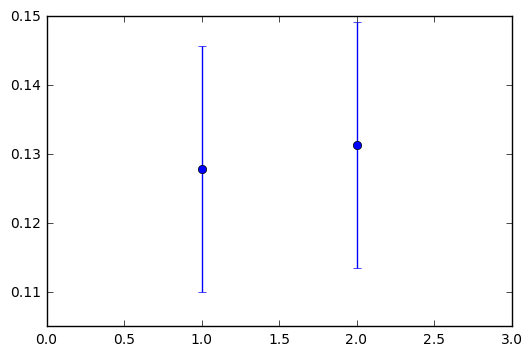

1.02721726889


In [5]:
d, s = get_dfs("insert_no_trig")

s_mean = s.mean()[1:][0]
d_mean = d.mean()[1:][0]
s_std = d.std()[1:][0]
d_std = d.std()[1:][0]

plt.errorbar([1,2], [d_mean, s_mean], yerr=[d_std, s_std], fmt='o')
plt.xlim(0,3)
plt.show()

print(s_mean / d_mean)

## Delete

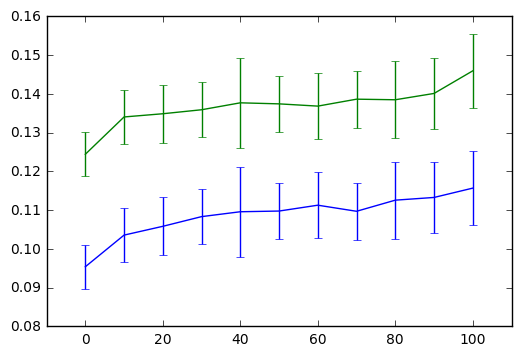

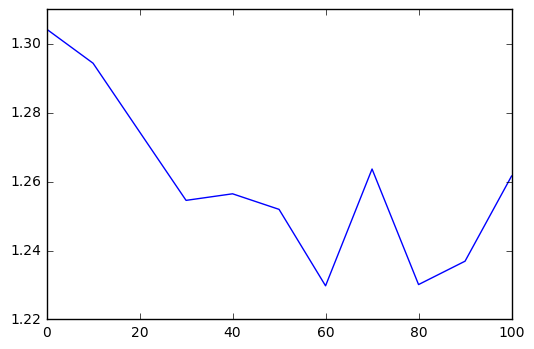

In [6]:
plot_benchmark("delete_new")

## Where

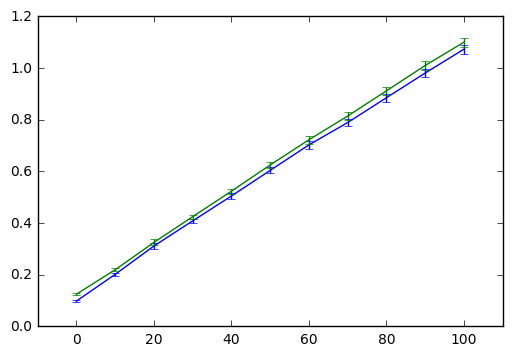

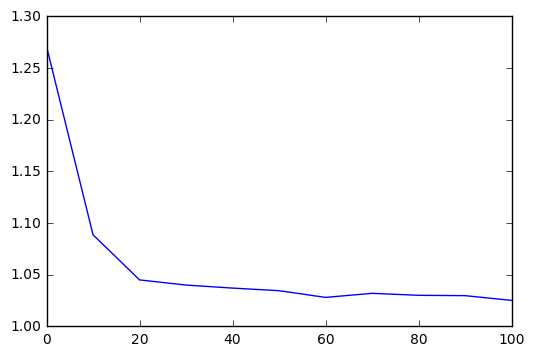

In [8]:
plot_benchmark("where_new")